In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime



In [ ]:
# Step 1: data preparation
 
data = pd.read_csv(r'c:\MY FILE\Data science2\group project\final_dataset_with_adjusted_prices_simulated_turkey_sales (2).csv')
data['Date'] = pd.to_datetime(data['Date'])



In [4]:
# Step 2: Using ARIMA model to predict nexgt week competitors' price
competitor_price_data = data[['Date', 'Unit_Price_Competitor']]
competitor_price_data.set_index('Date', inplace=True)
competitor_price_data_weekly = competitor_price_data.resample('W').mean().dropna()
arima_competitor = ARIMA(competitor_price_data_weekly, order=(5,1,0))
arima_competitor_result = arima_competitor.fit()
forecast_competitor_price = arima_competitor_result.forecast(steps=1)  # predict com


In [6]:
# Step 3: Using ARIMA model to predict week's NoFrill's price
our_price_data = data[['Date', 'Inventory_Our_Company', 'Unit_Price_Our_Company']]
our_price_data.set_index('Date', inplace=True)
our_price_data_weekly = our_price_data.resample('W').mean().dropna()

arima_our_company = ARIMA(our_price_data_weekly['Unit_Price_Our_Company'], order=(5,1,0))
arima_our_company_result = arima_our_company.fit()
forecast_our_price = arima_our_company_result.forecast(steps=1)  # 预测一周的价格



In [9]:
# Step 4: Align with pricing strategy
# if predicted NoFrill price is higher than competitor's predicted price, we will minor 5 on predicted competitors' price. 
adjustment_amount = 5

adjusted_price = (forecast_our_price.iloc[0] - adjustment_amount 
                  if forecast_our_price.iloc[0] > forecast_competitor_price.iloc[0] 
                  else forecast_our_price.iloc[0])


In [10]:
# Prediction
print("预测的竞争对手价格：", forecast_competitor_price.iloc[0])
print("预测的我们公司价格：", forecast_our_price.iloc[0])
print("调整后的我们公司价格：", adjusted_price)


预测的竞争对手价格： 51.92398451509888
预测的我们公司价格： 43.46198962313074
调整后的我们公司价格： 43.46198962313074


In [11]:
# 找到训练数据集中的最后一个日期
last_date = data['Date'].max()

# 计算预测日期（下一个周的开始日期）
prediction_date = last_date + pd.DateOffset(weeks=1)

# 输出预测日期
print("预测的日期是：", prediction_date.strftime('%Y-%m-%d'))


预测的日期是： 2023-12-12


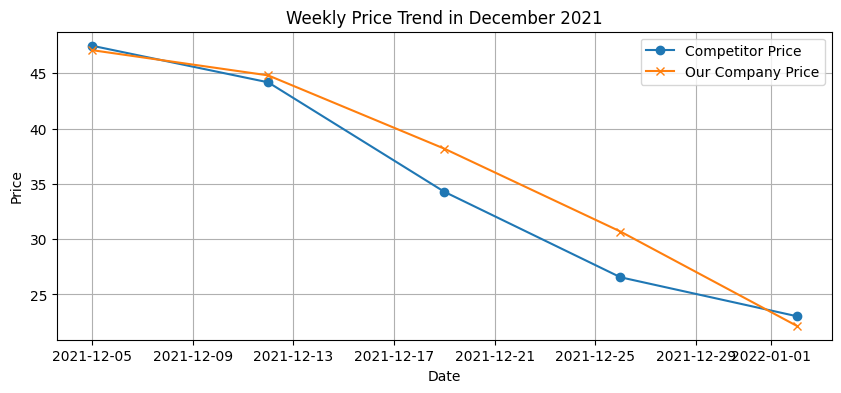

In [11]:

# 生成2021年12月1日至31日的价格变化趋势图

# 筛选出2021年12月的数据
data_dec_2021 = data[(data['Date'].dt.year == 2021) & (data['Date'].dt.month == 12)]

# 按周重采样，并只计算价格列的均值
weekly_dec_2021 = data_dec_2021[['Unit_Price_Competitor', 'Unit_Price_Our_Company']].set_index(data_dec_2021['Date']).resample('W').mean()

# 绘制价格趋势图
plt.figure(figsize=(10, 4))
plt.plot(weekly_dec_2021.index, weekly_dec_2021['Unit_Price_Competitor'], label='Competitor Price', marker='o')
plt.plot(weekly_dec_2021.index, weekly_dec_2021['Unit_Price_Our_Company'], label='Our Company Price', marker='x')
plt.title('Weekly Price Trend in December 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



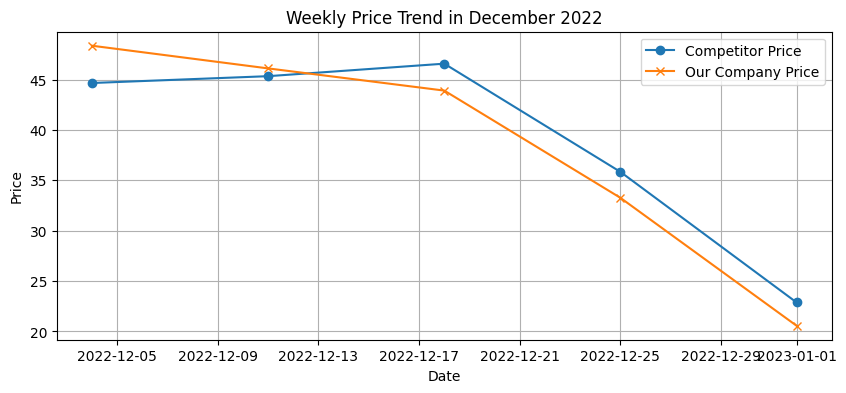

In [12]:
# 生成2022年12月1日至31日的价格变化趋势图

# 筛选出2022年12月的数据
data_dec_2022 = data[(data['Date'].dt.year == 2022) & (data['Date'].dt.month == 12)]

# 按周重采样，并只计算价格列的均值
weekly_dec_2022 = data_dec_2022[['Unit_Price_Competitor', 'Unit_Price_Our_Company']].set_index(data_dec_2022['Date']).resample('W').mean()

# 绘制价格趋势图
plt.figure(figsize=(10, 4))
plt.plot(weekly_dec_2022.index, weekly_dec_2022['Unit_Price_Competitor'], label='Competitor Price', marker='o')
plt.plot(weekly_dec_2022.index, weekly_dec_2022['Unit_Price_Our_Company'], label='Our Company Price', marker='x')
plt.title('Weekly Price Trend in December 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


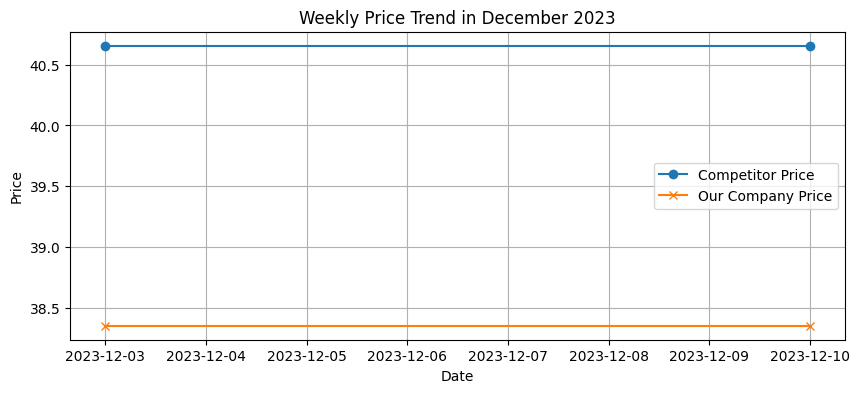

In [13]:
# 生成2023年12月1日至31日的价格变化趋势图

# 筛选出2023年12月的数据
data_dec_2023 = data[(data['Date'].dt.year == 2023) & (data['Date'].dt.month == 12)]

# 按周重采样，并只计算价格列的均值
weekly_dec_2023 = data_dec_2023[['Unit_Price_Competitor', 'Unit_Price_Our_Company']].set_index(data_dec_2023['Date']).resample('W').mean()

# 绘制价格趋势图
plt.figure(figsize=(10, 4))
plt.plot(weekly_dec_2023.index, weekly_dec_2023['Unit_Price_Competitor'], label='Competitor Price', marker='o')
plt.plot(weekly_dec_2023.index, weekly_dec_2023['Unit_Price_Our_Company'], label='Our Company Price', marker='x')
plt.title('Weekly Price Trend in December 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


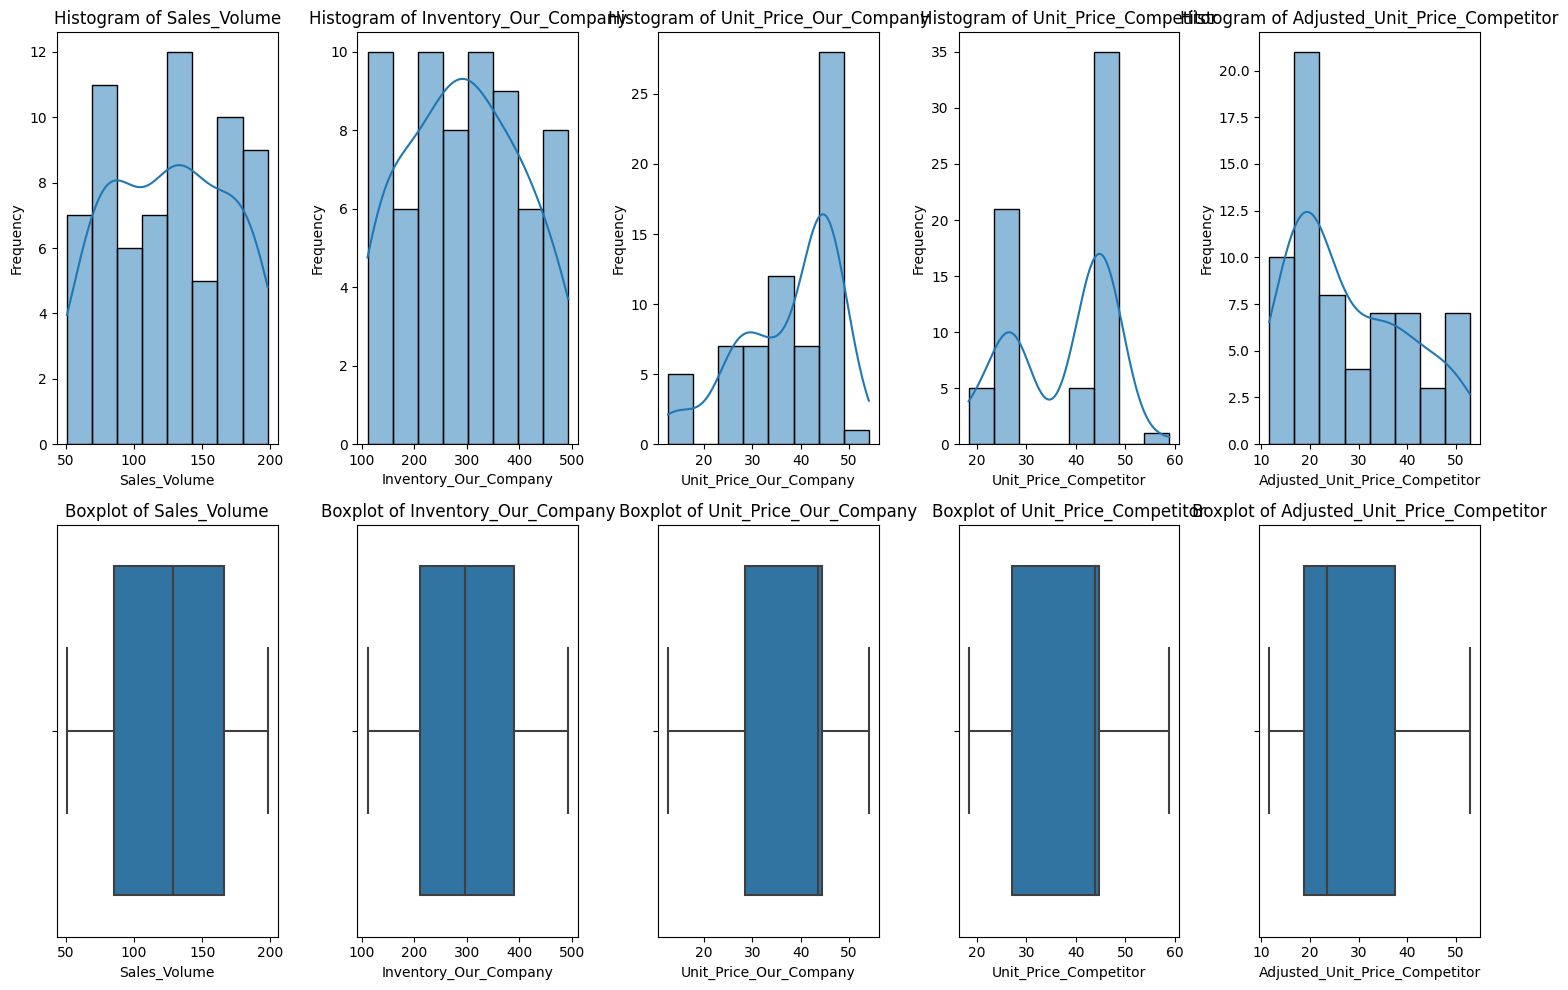

,Sales_Volume,Inventory_Our_Company,Unit_Price_Our_Company,Unit_Price_Competitor,Adjusted_Unit_Price_Competitor
Sales_Volume,1.000000,0.011667,-0.084444,-0.119283,0.081695
Inventory_Our_Company,0.011667,1.000000,0.035214,0.033366,0.045573
Unit_Price_Our_Company,-0.084444,0.035214,1.000000,0.948979,0.141369
Unit_Price_Competitor,-0.119283,0.033366,0.948979,1.000000,0.026072
Adjusted_Unit_Price_Competitor,0.081695,0.045573,0.141369,0.026072,1.000000


In [14]:
import seaborn as sns

# 绘制直方图和箱线图
num_cols = ['Sales_Volume', 'Inventory_Our_Company', 'Unit_Price_Our_Company', 'Unit_Price_Competitor', 'Adjusted_Unit_Price_Competitor']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols), i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(2, len(num_cols), len(num_cols) + i)
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# 相关性分析
correlation_matrix = data[num_cols].corr()
correlation_matrix



直方图显示了每个数值列的分布情况，包括其形状、中心趋势和离散程度。例如，Unit_Price_Our_Company和Unit_Price_Competitor看起来呈现出某种程度的双峰分布。
箱线图提供了关于每个数值列的离群值、四分位数范围以及中位数的可视化信息。
相关性分析
相关性矩阵展示了不同数值列之间的相关性：

Unit_Price_Our_Company和Unit_Price_Competitor之间有非常高的相关性（约0.95），这表明这两个变量可能受到类似因素的影响或彼此相关。
其他列之间的相关性较低，表明它们之间的关系不那么紧密。


In [15]:
import statsmodels.api as sm

# 假设我们要预测的目标变量是 'Unit_Price_Our_Company'
# 选择一些可能的解释变量，例如 'Sales_Volume', 'Inventory_Our_Company', 'Unit_Price_Competitor'
features = ['Sales_Volume', 'Inventory_Our_Company', 'Unit_Price_Competitor']
X = data[features]
y = data['Unit_Price_Our_Company']

# 添加一个常数项到解释变量，这是线性回归模型的标准做法
X = sm.add_constant(X)

# 构建线性回归模型
model = sm.OLS(y, X).fit()

# 输出模型的摘要信息，包括每个特征的显著性
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Unit_Price_Our_Company   R-squared:                       0.901
Model:                                OLS   Adj. R-squared:                  0.897
Method:                     Least Squares   F-statistic:                     192.0
Date:                    Fri, 24 Nov 2023   Prob (F-statistic):           1.23e-31
Time:                            02:57:30   Log-Likelihood:                -172.28
No. Observations:                      67   AIC:                             352.6
Df Residuals:                          63   BIC:                             361.4
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

模型拟合度：

R-squared值为0.901，这表明模型能够解释目标变量变异的90.1%。这是一个相对较高的R²值，意味着模型的拟合度良好。
特征显著性：

Sales_Volume的系数为0.0068，但是P值为0.468，远高于通常的显著性水平（如0.05），这意味着Sales_Volume不是一个显著的预测因子。
Inventory_Our_Company的系数为0.0003，P值为0.938，同样表明这个变量对于预测Unit_Price_Our_Company也不显著。
Unit_Price_Competitor的系数为0.9502，P值几乎为0，远低于0.05的显著性水平，表明Unit_Price_Competitor对于预测我们公司的单价是非常显著的。
系数解释：

对于Unit_Price_Competitor，系数为0.9502，这表示竞争对手的单价每增加一个单位，我们公司的单价预计会增加0.9502个单位，前提是其他变量保持不变。
模型诊断：

Durbin-Watson统计量用于检测残差的自相关，其值为0.395，接近于0，表明可能存在正自相关。
条件数（Cond. No.）非常高，为1.92e+03，这可能表明存在强烈的多重共线性或其他数值问题。这可能是因为Unit_Price_Competitor和Unit_Price_Our_Company之间有很强的相关性。
潜在问题：

强烈的多重共线性意味着模型中的解释变量彼此高度相关，这可能导致模型估计不稳定并影响解释变量的显著性测试。
综上所述，这个模型表明Unit_Price_Competitor是一个强有力的预测因子，而其他变量可能不那么重要。然而，多重共线性的存在可能需要进一步的诊断和可能的模型调整。